In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *
from analysis import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

df = pd.read_pickle('adk-concentration-scan.pickle')

In [2]:
def return_concentration_slice(df, concentration):
    tmp = df[np.round(df['Concentration'], 1) ==  np.round(concentration, 1)]
    return tmp

In [3]:
tmp = return_concentration_slice(df, -3)

In [4]:
tmp.sum()

Concentration                                                    -2709
Directional flux                                              -356.859
Driven flux                                                      31255
File                 chi1ALA11chi1ALA127chi1ALA17chi1ALA176chi1ALA1...
Intersurface flux                                              8885.79
Max load                                                         0.393
Max power                                                      59.4986
ResID                1112717176186188194203207373849556673893959911...
dtype: object

In [5]:
tmp['Max power'].sum()

59.49860185847516

Okay, let's say that the energy released by ATP hydrolysis under cellular conditions is about -54 KJ/mol (http://book.bionumbers.org/how-much-energy-is-released-in-atp-hydrolysis/). This comes to about -12.9 kcal/mol. The catalytic rate of ADK is about 312 per second. The input power to the enzyme then is approximately -12.9 kcal/mol * 312 per second = 4000 kcal per mol per second.

Assuming ATP hydrolysis supplies *all* the energy to all the angles in ADK and that power generation by one angle is independent of all the others, we can calculate how much power is being captured by the directional flux of the angles.

I'm not sure the above is correct, I think it's missing a factor. I believe the calculation should read
$$
P = \Delta G(S) \sum_i k_{catalysis} \times p_{bound, i}(S)
$$

In [9]:
delta_G = -7.2 # kcal per mol at [S] = 0.1 M
k_catalysis = 312 # per second

In [12]:
this = simulation(data_source = 'adk_md_data')
this.name = 'psiSER41'
this.cSubstrate = 0.1
this.simulate()
prob_bound_state = np.sum(this.ss[this.bins:2*this.bins])

In [13]:
power_in = delta_G * k_catalysis * prob_bound_state

In [14]:
print(power_in)

-2157.14749756


In [20]:
power_in = 4000 # kcal per mol per second
power_out = tmp['Max power'].sum()
print('Power ratio = {:0.5f}'.format(power_out / power_in))

Power ratio = 0.01487


The energy released by ATP hydrolysis depends on the concentration, as does the power generated by the angles.

Notice that the maximum power is dominated by just a few angles.

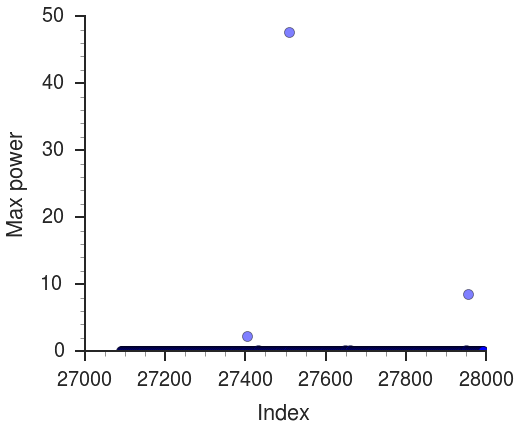

In [33]:
aesthetics.generic_plot(tmp.index, tmp['Max power'], xlabel='Index', ylabel='Max power')

In [39]:
low_power = sum(tmp['Max power'] < 1)
high_power = sum(tmp['Max power'] >= 1)
print('There are {} low power angles and just {} high power angles.'.format(low_power, high_power))
zero_power = sum(tmp['Max power'] == 0.0)
print('There are {} exactly zero power angles, where the algorithm probably bailed.'.format(zero_power))

There are 900 low power angles and just 3 high power angles.
There are 279 exactly zero power angles, where the algorithm probably bailed.


In [40]:
medium_power = sum(tmp['Max power'] >= 0.01)
print('There are {} medium power angles.'.format(medium_power))

There are 16 medium power angles.


In [6]:
tmp = return_concentration_slice(df, -1)

In [8]:
power_out = tmp['Max power'].sum()
print('Sum of all power = {:0.5f} at this concentration'.format(power_out))

Sum of all power = 144.77982 at this concentration
